In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import os
import datetime as dt

In [2]:
os.getcwd()

'C:\\Users\\user1\\Desktop\\창원_빅데이터_공모전\\Code_EDA'

In [4]:
Changwon_Tmap_df2 = pd.read_csv('C:\\Users\\user1\\Desktop\\창원_빅데이터_공모전\\Preprocessed_data\\Changwon_Tmap_df_ver2.csv')
del Changwon_Tmap_df2['Unnamed: 0']
Changwon_Tmap_df2.head()

,일자,지역(시도),지역(시군구),검색지명,검색지유형1,검색지유형2,검색지유형3,검색지랭킹(시군구내),요일,주말/주중,휴일
0,2019-01-11,경남,창원시 성산구,창원경상대학교병원,의료편의,의료시설,종합병원,1,금요일,0,0
1,2019-01-11,경남,창원시 성산구,반림트리비앙아파트,건물/시설,주요건물,아파트단지,2,금요일,0,0
2,2019-01-11,경남,창원시 성산구,롯데백화점창원점,쇼핑,대형유통점,백화점,3,금요일,0,0
3,2019-01-11,경남,창원시 성산구,반송노블파크아파트,건물/시설,주요건물,아파트단지,4,금요일,0,0
4,2019-01-11,경남,창원시 성산구,LG전자창원2공장,기업/단체,주요그룹,LG,5,금요일,0,0


In [5]:
Changwon_Tmap_df2.dtypes

일자             object
지역(시도)         object
지역(시군구)        object
검색지명           object
검색지유형1         object
검색지유형2         object
검색지유형3         object
검색지랭킹(시군구내)     int64
요일             object
주말/주중           int64
휴일              int64
dtype: object

In [38]:
#일자 데이터 타입을 datetime으로 변경 
Changwon_Tmap_df2['일자'] = Changwon_Tmap_df2['일자'].astype('str')
Changwon_Tmap_df2['일자'] = pd.to_datetime(Changwon_Tmap_df2['일자'])

# 주말/주중, 휴일 또한 데이터 타입을 int -> str 
Changwon_Tmap_df2['주말/주중'] = Changwon_Tmap_df2['주말/주중'].astype('str')
Changwon_Tmap_df2['휴일'] = Changwon_Tmap_df2['휴일'].astype('str')

Changwon_Tmap_df2.dtypes

일자             datetime64[ns]
지역(시도)                 object
지역(시군구)                object
검색지명                   object
검색지유형1                 object
검색지유형2                 object
검색지유형3                 object
검색지랭킹(시군구내)             int64
요일                     object
주말/주중                  object
휴일                     object
dtype: object

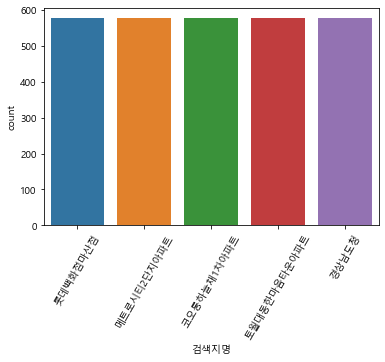

In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'

descending_order = Changwon_Tmap_df2['검색지명'].value_counts().head(5).sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 60)

sns.countplot('검색지명',data=Changwon_Tmap_df2,order=descending_order)

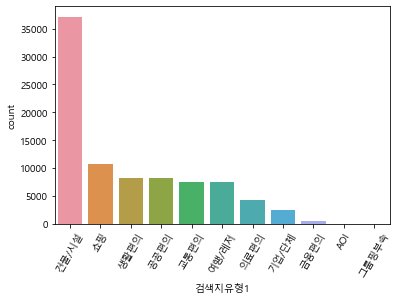

In [18]:
descending_order = Changwon_Tmap_df2['검색지유형1'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 60)

sns.countplot('검색지유형1',data=Changwon_Tmap_df2,order=descending_order)

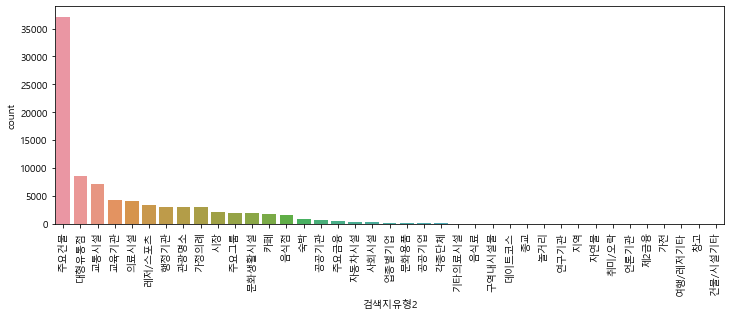

In [22]:
descending_order = Changwon_Tmap_df2['검색지유형2'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(12,4))
plt.xticks(rotation = 90)

sns.countplot('검색지유형2',data=Changwon_Tmap_df2,order=descending_order)

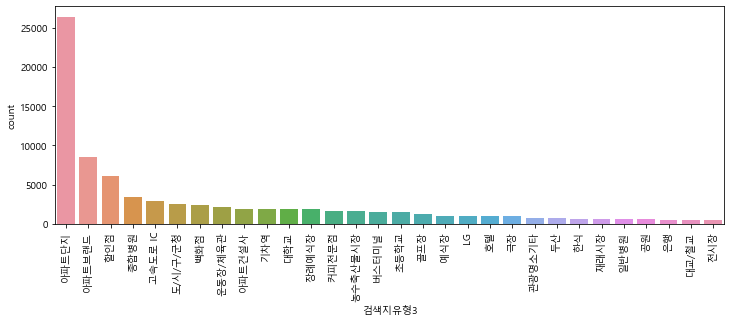

In [25]:
descending_order = Changwon_Tmap_df2['검색지유형3'].value_counts().head(30).sort_values(ascending=False).index

plt.figure(figsize=(12,4))
plt.xticks(rotation = 90)

sns.countplot('검색지유형3',data=Changwon_Tmap_df2,order=descending_order)

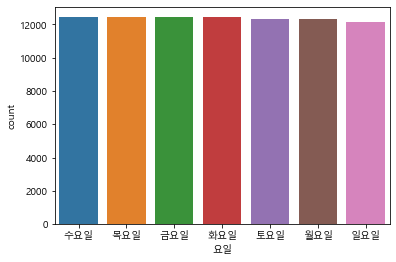

In [26]:
descending_order = Changwon_Tmap_df2['요일'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)

sns.countplot('요일',data=Changwon_Tmap_df2,order=descending_order)

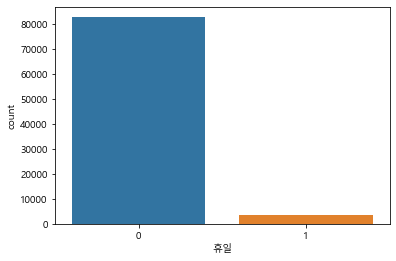

In [27]:
descending_order = Changwon_Tmap_df2['휴일'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)

sns.countplot('휴일',data=Changwon_Tmap_df2,order=descending_order)

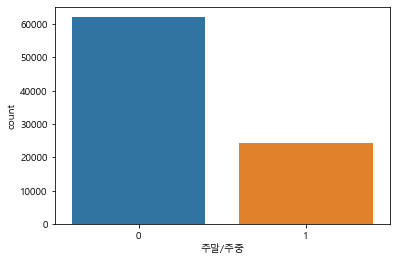

In [28]:
descending_order = Changwon_Tmap_df2['주말/주중'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6,4))
plt.xticks(rotation = 0)

sns.countplot('주말/주중',data=Changwon_Tmap_df2,order=descending_order)

In [40]:
Changwon_Tmap_df2['년도'] = Changwon_Tmap_df2['일자'].dt.year

In [51]:
Changwon_Tmap_df2.dtypes

일자             datetime64[ns]
지역(시도)                 object
지역(시군구)                object
검색지명                   object
검색지유형1                 object
검색지유형2                 object
검색지유형3                 object
검색지랭킹(시군구내)             int64
요일                     object
주말/주중                  object
휴일                     object
년도                      int64
dtype: object

In [50]:
# 주거단지인 아파트단지, 아파트브랜드를 우선 제거 후 년도별 검색지 장소 추출
mask = (Changwon_Tmap_df2['검색지유형3']!='아파트단지')&(Changwon_Tmap_df2['검색지유형3']!='아파트브랜드')
removed_residential_area_df = Changwon_Tmap_df2.loc[mask,:]

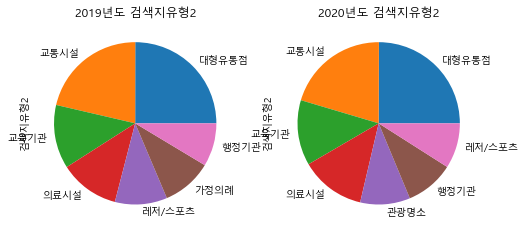

In [57]:
# 년도별 검색지유형2 pie chart(단, 주거지역 제외 & 2020년은 7월까지의 데이터)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
plt.title("2019년도 검색지유형2")
ax2 = fig.add_subplot(1,2,2)
plt.title("2020년도 검색지유형2")

removed_residential_area_df[removed_residential_area_df['년도']==2019]['검색지유형2'].value_counts().head(7).plot.pie(ax=ax1)
removed_residential_area_df[removed_residential_area_df['년도']==2020]['검색지유형2'].value_counts().head(7).plot.pie(ax=ax2)